# Example : noise_macro

This notebook provides an example noise spectrum for the macroscopic experiment, as well as common parameters. 

In [1]:
from math import *
import os, sys
sys.path.append(os.getcwd() + '\..\src')
from quantumnoise import *

## 1. Voltage PSD

The PSD function for voltage noise on the macroscopic experiment is provided in the source code, and can be accessed with :
```python
macro_noise(w)
```
where w is the angular frequency. 

We first define a noise process by passing a noise PSD function to the Noise() class :

In [2]:
my_noise = Noise(noise_macro)

The noise PSD can then be viewed :

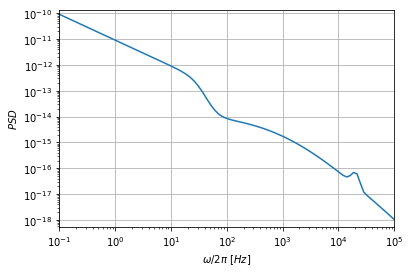

In [3]:
my_noise.show()

## 2. Lifetime, Dephasing time and Decoherence Time

For every noise spectrum, we can compute a lifetime $T_1$, a dephasing time $T_\phi$, and a decoherence time $T_2$. We'll start by computing the lifetime. A particular type of noise has an associated coupling strength for lifetimes and dephasing times. Some noise sources won't cause any lifetime decay, others no dephasing decay, and some will cause both simultaneous decays. Voltage noise will cause both lifetime and dephasing time decay. 

We must first calculate the corresponding lifetime and dephasing coupling strengths, here denoted by Dx and Dz respectively :

In [4]:
dzB = 23 # Magnetic field gradient
v = 2*pi*250e3 # Secular frequency
d = 310e-6 # Distance to electrode 
eta = 0.046 # Geometric factor

my_noise.Dx = voltage_Dx(dzB, v, d, eta)
my_noise.Dz = voltage_Dz(dzB, v, d, eta)

The coupling strengths are functions of the magnetic field gradient, the secular frequency, the distance to electrodes and the geometric factor. 

The relevent times can now be found :

In [5]:
Omw = 2*pi*15e3
N = 1

T1 = my_noise.T1(Omw)
Tphi = my_noise.Tphi(Omw, N)
T2 = my_noise.T2(Omw, N)

print('T1 : ' + str(T1) + '\nTphi : ' + str(Tphi) + '\nT2 : ' + str(T2))

T1 : 0.7320521366887514
Tphi : 1.056281816044906
T2 : 0.7425486680517893


C:\Users\Christophe\Documents\quantumnoise\examples\..\src\quantumnoise.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/((w * t)**2) * abs(1 +
C:\Users\Christophe\Documents\quantumnoise\examples\..\src\quantumnoise.py:69: RuntimeWarning: invalid value encountered in double_scalars
  2*sum([((-1)**(i+1))*cmath.exp(1j*w*t/(N+1)*(i+1))*cos(w*tpi/2) for i in range(N)]))**2
C:\Users\Christophe\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In the above example, Omw corresponds to the dressed state splitting, and N is the number of refocussing pulses. 

## 3. Decay functions

A qubit will decohere over time, and its fidelity, ie. integry of information, will deteriorate. There are two scenarios: when the qubit is idle and when it is evolving due to an external field (for example during a gate). The corresponding decay functions are :
```python
fdecay(t, Omw, N)
fdecayrabi(t, OmR, Omw)
```
Here, Omw denotes the dressed state splitting, N the number of refocusing pulses, and OmR the power of the gate field. 

Let us assume that we perform a two qubit gate, with a single refocusing pulse, and a dressed state splitting of $2\pi 15$ kHz. If the gate time is 3ms, the fidelity will be :


In [6]:
my_noise.fdecay(3e-3, 2*pi*15e3, 1)

0.9979526673392656

The fidelity of a single qubit gate which lasts 1 ms is : 

In [7]:
my_noise.fdecayrabi(1e-3, 1/(2*pi*1e-3), 2*pi*15e3)

0.9989760064498673

## 4. Extending to a scalable architecture

The parameters used up to now correspond to those of the macroscopic experiment. We can estimate the performance of a chip based trap which would be used in a scalable architecture. The parameters would be (gross estimate) :

In [14]:
dzB = 150 # Magnetic field gradient
v = 2*pi*250e3 # Secular frequency
d = 150e-6 # Distance to electrode 
eta = 0.1 # Geometric factor

my_noise.Dx = voltage_Dx(dzB, v, d, eta)
my_noise.Dz = voltage_Dz(dzB, v, d, eta)

In [15]:
Omw = 2*pi*15e3
N = 1

T1 = my_noise.T1(Omw)
Tphi = my_noise.Tphi(Omw, N)
T2 = my_noise.T2(Omw, N)

f2q = my_noise.fdecay(200e-6, Omw, N)
f1q = my_noise.fdecayrabi(30e-6, 1/(2*pi*1e-3), Omw)

print('T1 : ' + str(T1) + '\nTphi : ' + str(Tphi) + '\nT2 : ' + str(T2)
      + '\nFidelity 1q = ' + str(f1q) + '\nFidelity 2q = ' + str(f2q) )

T1 : 0.0008526876253199453
Tphi : 0.2
T2 : 0.2
Fidelity 1q = 0.9739573772761211
Fidelity 2q = 0.8893394801907727


*WARNING : $T_\phi$ and $T_2$ times aren't accurately estimated for low values. Will be fixed in next update!*